In [1]:
import numpy as np # импорт бибилиотеки numpy
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot
from scipy import signal
from scipy.linalg import dft

# Теория

- Континуальная форма дискретизованного сигнала $x_{д}(t)$ (аналоговый сигнал - $x_{а}(t)$)
$$
x_{д}(t) = \sum_{k=-\infty}^{+\infty}x[k]\delta(t - k\Delta t), x[k] \triangleq \mathbf{\Delta t} \ x_{а}(k \Delta t) 
$$
**Важно**, что частота дискретизации $ f_{д} = \frac{1}{\Delta t}$.
- Связь спектра дискретизованного сигнала $X_{д}$ со спектром аналогового сигнала $X_{a}$
$$
X_{д}(f) = \sum_{n=-\infty}^{+\infty}X_{а}(f - nf_{д})
$$, 
- ДВПФ (спектр дискретизованного сигнала по отсчётам) и обратное ДВПФ
$$
X_{д}(f) = \sum_{k=-\infty}^{+\infty}x[k]e^{-j2\pi f k\Delta t}, \\
x[k] = \Delta t \int_{-f_{д}/2}^{+f_{д}/2} X_{д}(f)e^{+j2\pi f k\Delta t}df
$$
- Ряд Котельникова (оценка аналогового сигнала по дискретным отсчётам)
$$
x_{a}(t) = \sum_{k=-\infty}^{+\infty}x_{a}(k\Delta t) \frac{sin(2\pi f_{в}(t - k \Delta t))}{2\pi f_{в}(t - k \Delta t)}
$$
Здесь предполагается, что спектр аналогового сигнала ограничен полосой $[-f_{в}; +f_{в}]$.\
При $f_{д} = \frac{1}{\Delta t} = 2 f_{в}$ спектр $X_{a}(f)$ попадает в полосу Найквиста $[-f_{д}/2; +f_{д}/2]$ и равентсво точное.\
Иначе в качестве $f_{в}$ берём некоторую частоту, вне которой мощность сигнала мала, и $f_{д}$ (а значит и $\Delta t$) снова полагаем равной $2f_{в}$ ($\Delta t = \frac{1}{2f_{в}}$).
- ДПФ
$$
X[n] = \sum_{k=0}^{N-1}x[k]e^{-j\frac{2\pi}{N}nk}, \\
x[k] = \frac{1}{N}\sum_{n=0}^{N-1}X[n]e^{+j\frac{2\pi}{N}nk}
$$
- Связь между ДВПФ и ДПФ
$$
X(\nu) \Big |_{\nu = \frac{n}{N}} = X[n], где\ \nu = \frac{f}{f_{д}}
$$

# Занятие 1. Основные свойства ДВПФ
Далее значения $N$, $L$, ${{\nu }_{0}}$ следует использовать из таблицы в соответствии с Вашим вариантом задания.
- $N$ = 7, $L$ = 2, ${{\nu }_{0}}$ = 0.1

## Задача 1.1.  Прямоугольный импульс в дискретной форме.  

С помощью моделирования  вычислите и постройте график для модуля и фазы ДВПФ  $X_N(\nu)$  последовательности из $N$ последовательных единичных импульсов ${{x}_{N}}[k]=\sum\limits_{m=0}^{N-1}{\mathbf{1}}\left[ k-m \right]$ для $\nu \in [-0,5; \;0,5]$.  Сравните результат с аналитической записью для  $X_N(\nu)$ (задача 1.б из задания к допуску).  Заполнить таблицу, используя результаты моделирования и аналитические записи. Принять частоту дискретизации равной 1 Гц. 

| Значение <br> X(0)  | Ширина $\Delta\nu$ главного лепестка <br> на нулевом уровне |  Точки скачков фазы <br> на $\pi$  |  Энергия$^2$ $\times\Delta t$ <br> $ \int_{-1/2}^{1/2}\|X(\nu)\|^{2}d\nu $ |
|:-----------:|:---:|:---:|:---:|
|      7.0       |  0.14*2=0.28   | +-0.43;+-0.28;+-0.14    | 7=1^2+1^2+...  |
|      N=7      |  1/N*2 = 0.28   |  +-0.14;+-0.28;+-0.43   |   7  |

ДВПФ прямоугольного окна:
$$
X_w = \frac{\sin(\pi \nu N)}{\sin(\pi \nu)}e^{-j(N-1)\pi \nu}
$$

$^2$ Для дискретного сигнала рассматривают энергию $\int_{-1/2}^{1/2}{|}X(\nu ){{|}^{2}}d\nu $, приходящуюся на один период частоты, т.е. на полосу частот шириной ${{f}_{\text{д}}}$:

$\int_{-0,5{{f}_{\text{д}}}}^{0,5{{f}_{\text{д}}}}{|}X(f){{|}^{2}}df=\frac{1}{\Delta t}\int_{-1/2}^{1/2}{|}X(\nu ){{|}^{2}}d\nu $
Для ее вычисления можно воспользоваться равенством Парсеваля для ДВПФ. 


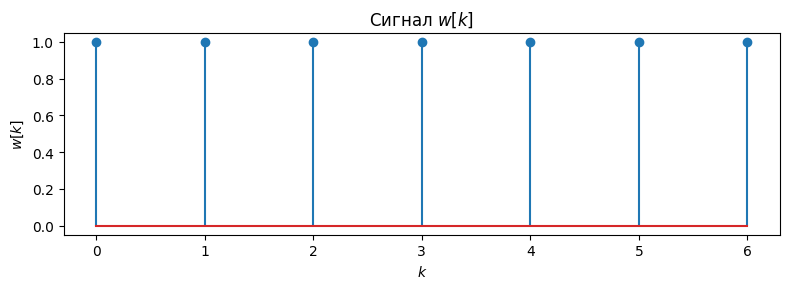

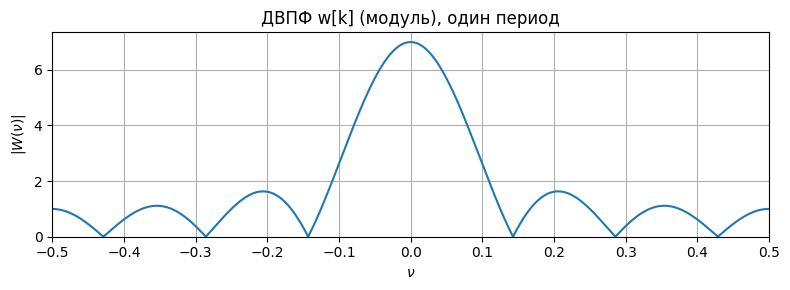

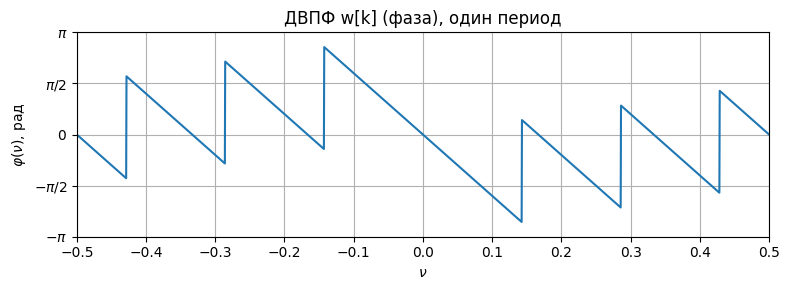

In [2]:
N = 7

w = np.ones(N)
k = np.arange(N)

# Stem
plt.figure(figsize=[8, 3])
plt.stem(k, w)
plt.title('Сигнал $w[k]$')
plt.xlabel('$k$')
plt.ylabel('$w[k]$')
plt.tight_layout()

# DTFT abs
def dtft(x, M=2048):
    return  np.arange(M)/M-0.5, np.fft.fftshift(np.fft.fft(x, M))

plt.figure(figsize=[8, 3])
nu, W = dtft(w, M=2048)
plt.plot(nu, abs(W))

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ w[k] (модуль), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$|W(\\nu)|$')

plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

# DTFT phase
plt.figure(figsize=[8, 3])
plt.plot(nu, np.angle(W))
plt.xlim([-0.5, 0.5])
plt.ylim([-np.pi, np.pi])
plt.title('ДВПФ w[k] (фаза), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$\\varphi(\\nu)$, рад')
plt.yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], labels=("$-\\pi$", "$-\\pi/2$", "$0$", "$\\pi/2$", "$\\pi$"))
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

> В допуске надо понять, что сигнал действительный => можно больше точек восстановить (3???), спектр чётный (???) Там же считаем, что более ничего не дано вообще, т.е. там не нули, а хз что, известны только вот те три(???) отсчёта.
> Где-то потом спектр действительного симметричный, а мнимого антисимметричный.
> 

## Задача 1.2.  Свойство масштабирования. 

Постройте последовательность ${{x}_{L}}[k]=\sum\limits_{m=-\infty }^{\infty }{{{x}_{N}}}[m]\mathbf{1}[k-mL]$, добавив $L-1$ нулевой отсчет между каждой парой соседних отсчетов сигнала ${{x}_{N}}[k]$ (из задачи 1.1). С помощью моделирования постройте модуль ее ДВПФ для $\nu \in [-0,5; \;0,5]$ и сравните результат с ${{X}_{N}}(\nu L)$ (из задачи 1.1).


In [3]:
w = np.ones(N)

# Number of zeros to insert between elements
L = 2  # For example, if you want to insert 2 zeros (L-1 = 2)

# Create a new array with the required size
new_size = len(w) + (len(w) - 1) * (L - 1)
new_arr = np.zeros(new_size)
k = np.arange(new_size)

# Fill the new array with the original elements
new_arr[::L] = w

print("Original array:", w)
print("New array with zeros inserted:", new_arr)

Original array: [1. 1. 1. 1. 1. 1. 1.]
New array with zeros inserted: [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]


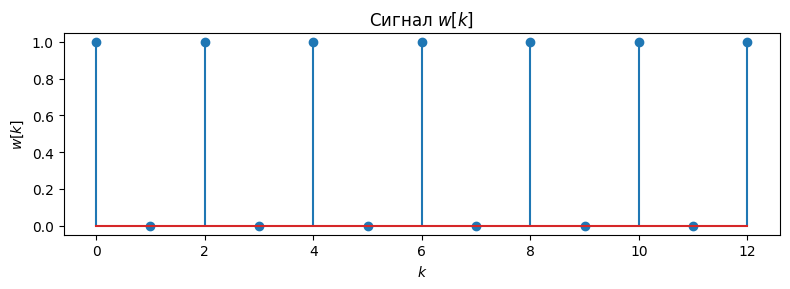

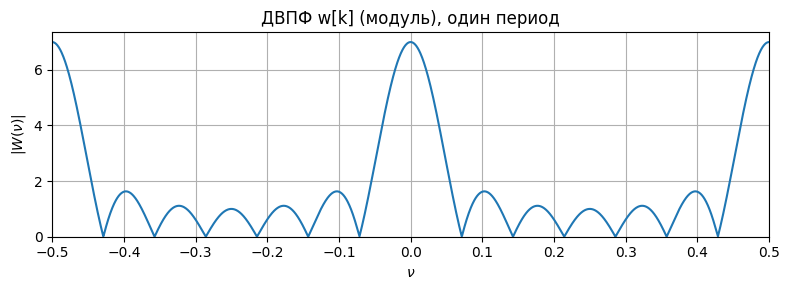

In [4]:
# Stem
plt.figure(figsize=[8, 3])
plt.stem(k, new_arr)
plt.title('Сигнал $w[k]$')
plt.xlabel('$k$')
plt.ylabel('$w[k]$')
plt.tight_layout()

# DTFT abs
def dtft(x, M=2048):
    return  np.arange(M)/M-0.5, np.fft.fftshift(np.fft.fft(x, M))

plt.figure(figsize=[8, 3])
nu, W = dtft(new_arr, M=2048)
plt.plot(nu, abs(W))

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ w[k] (модуль), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$|W(\\nu)|$')

plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

Видим, что модуль ДВПФ сжался в два раза по оси частот $\nu$.

ДВПФ интерполированного прямоугольного окна:
$$
X_L = \frac{\sin(\pi \nu NL)}{\sin(\pi \nu L)}e^{-j(N-1)\pi \nu L}
$$

## Задача 1.3.  Дифференцирование спектральной плотности.
Рассмотрите последовательность ${{x}_{D}}[k]=k\,{{x}_{N}}[k]$.  Постройте с помощью моделирования график для модуля ДВПФ этой последовательности ${{X}_{D}}(\nu )$ для $\nu \in [-0,5; \;0,5]$. 

** Получить численным или символьным дифференцированием график для $\frac{j}{2\pi }\frac{d{{X}_{N}}(\nu )}{d\nu }$ и сравнить его с ${{X}_{D}}(\nu ).$ 


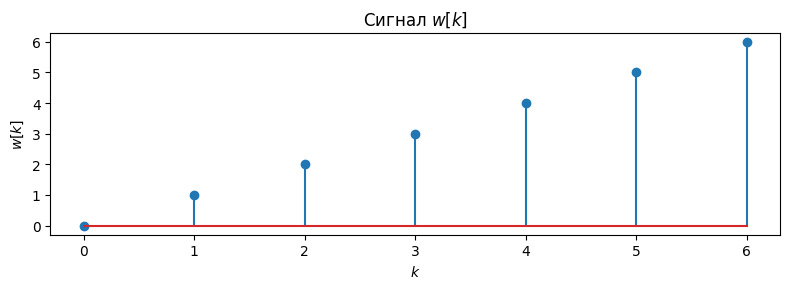

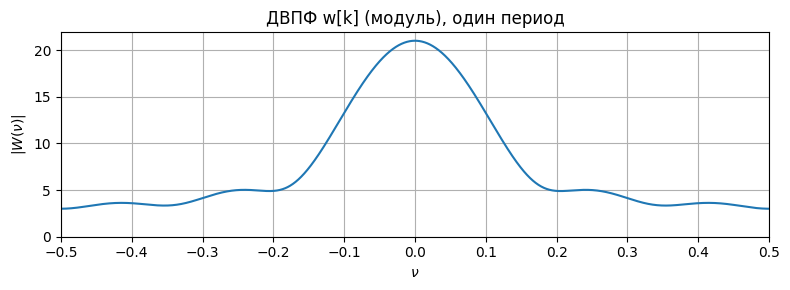

In [5]:
w = np.ones(N)
k = np.arange(N)

w_d = k * w

# Stem
plt.figure(figsize=[8, 3])
plt.stem(k, w_d)
plt.title('Сигнал $w[k]$')
plt.xlabel('$k$')
plt.ylabel('$w[k]$')
plt.tight_layout()

# DTFT abs
def dtft(x, M=2048):
    return  np.arange(M)/M-0.5, np.fft.fftshift(np.fft.fft(x, M))

plt.figure(figsize=[8, 3])
nu, W = dtft(w_d, M=2048)
plt.plot(nu, abs(W))

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ w[k] (модуль), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$|W(\\nu)|$')

plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

ДВПФ прямоугольного окна:
$$
X_N = \frac{\sin(\pi \nu N)}{\sin(\pi \nu)}e^{-j(N-1)\pi \nu} = \frac{\sin(7\pi \nu )}{\sin(\pi \nu)}e^{-j6\pi \nu}
$$
Тогда 
$$
\frac{j}{2\pi }\frac{d{{X}_{N}}(\nu )}{d\nu } = \frac{j}{2\pi} \pi \left( \frac{7 \cos(7\pi \nu) \sin(\pi \nu) - \sin(7\pi \nu) \cos(\pi \nu)}{\sin^2(\pi \nu)} - j6 \frac{\sin(7\pi \nu)}{\sin(\pi \nu)} \right) e^{-j6\pi \nu}
$$

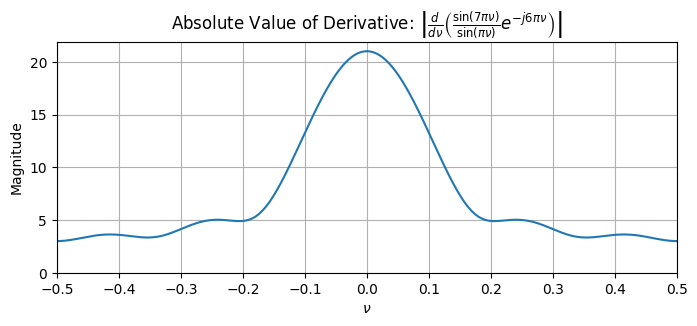

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the derivative function
def df_dnu(nu):
    # Handle division by zero at integer nu (using limits)
    with np.errstate(divide='ignore', invalid='ignore'):
        sin_pi = np.sin(np.pi * nu)
        cos_pi = np.cos(np.pi * nu)
        sin_7pi = np.sin(7 * np.pi * nu)
        cos_7pi = np.cos(7 * np.pi * nu)
        
        # Compute terms
        term1_numerator = 7 * cos_7pi * sin_pi - sin_7pi * cos_pi
        term1_denominator = sin_pi ** 2
        term2 = 6 * sin_7pi / sin_pi
        
        # Where sin_pi ≈ 0, use L'Hôpital's rule limit (nu → 0)
        mask = np.abs(sin_pi) < 1e-10
        term1 = np.where(~mask, 
                        term1_numerator / term1_denominator,
                        28/3 * (1 - 7*np.pi**2 * nu**2))  # Taylor expansion near 0
        term2 = np.where(~mask,
                        term2,
                        42 * np.pi * nu)  # Taylor expansion near 0
        
    # Combine terms and multiply by constants
    derivative = (1j/(2*np.pi)) * np.pi * (term1 - 1j*term2) * np.exp(-1j * 6 * np.pi * nu)
    return derivative

# Generate ν values
nu = np.linspace(-0.5, 0.5, 2048)  # High resolution to capture details

# Compute derivative
df = df_dnu(nu)

# Plot absolute value
plt.figure(figsize=(8, 3))
plt.plot(nu, np.abs(df))
plt.title(r'Absolute Value of Derivative: $\left|\frac{d}{d\nu}\left(\frac{\sin(7\pi\nu)}{\sin(\pi\nu)}e^{-j6\pi\nu}\right)\right|$')
plt.xlabel(r'$\nu$')
plt.ylabel('Magnitude')
plt.xlim([-0.5, 0.5])
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.ylim(bottom=0);


## Задача 1.4. Теорема смещения.
С помощью моделирования получите график модуля спектральной плотности ${{X}_{S}}(\nu )$ для сигнала ${{x}_{S}}[k]={{x}_{N}}[k]\exp (j2\pi {{\nu }_{0}}k)$. Приведите ответы на следующие вопросы.

а) Какую аналитическую форму записи имеет функция ${{X}_{S}}(\nu )$?

б) Как результат моделирования соотносится с теоремой смещения для ДВПФ? 

в) Почему получившийся спектр не симметричен относительно нулевой частоты? 


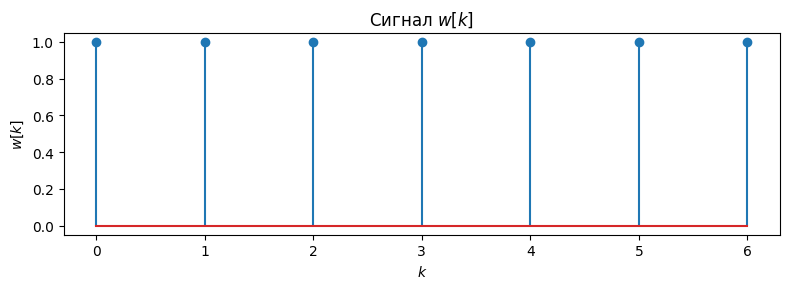

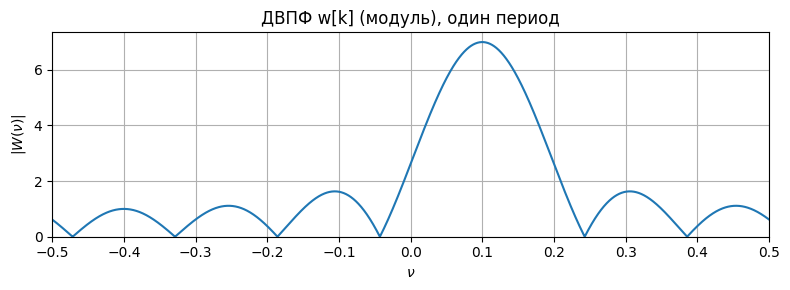

In [7]:
w = np.ones(N)
k = np.arange(N)

nu_0 = 0.1
w_s = w * np.exp( 1j * 2 * np.pi * nu_0 * k)

# Stem
plt.figure(figsize=[8, 3])
plt.stem(k, abs(w_s))
plt.title('Сигнал $w[k]$')
plt.xlabel('$k$')
plt.ylabel('$w[k]$')
plt.tight_layout()

# DTFT abs
def dtft(x, M=2048):
    return  np.arange(M)/M-0.5, np.fft.fftshift(np.fft.fft(x, M))

plt.figure(figsize=[8, 3])
nu, W = dtft(w_s, M=2048)
plt.plot(nu, abs(W))

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ w[k] (модуль), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$|W(\\nu)|$')

plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

a) 
$$
X_s(\nu) = X(\nu - \nu_0) =  \frac{\sin(\pi (\nu-\nu_0) N)}{\sin(\pi (\nu-\nu_0))}e^{-j(N-1)\pi (\nu-\nu_0)} = \frac{\sin(7\pi (\nu-0.1) )}{\sin(\pi (\nu-0.1))}e^{-j6\pi (\nu-0.1)}
$$
б) Результат согласуется с теоремой.\
в) Потому что он сдвинут!

## Задача 1.5. Теорема о свертке во временной области. 

Вычислите с помощью моделирования линейную дискретную свертку последовательности ${{x}_{N}}[k]=\sum\limits_{m=0}^{N-1}{\mathbf{1}}\left[ k-m \right]$ с точно такой же последовательностью. Постройте график для модуля ДВПФ  этой последовательности. Воспользовавшись теоремой о свертке, получите аналитическую запись ДВПФ. Заполните таблицу.

| Значение <br> X(0)  | Ширина $\Delta\nu$ главного лепестка <br> на нулевом уровне |  Энергия $\times\Delta t$ $ \int_{-1/2}^{1/2} \|X(\nu)^{2}\| d\nu $ | 
|:-----------:|:---:|:--------:|
|      49       |  2*0.143   |   231.0  |
|      7**2=49       |  2*(1/7)   |  231.0   |

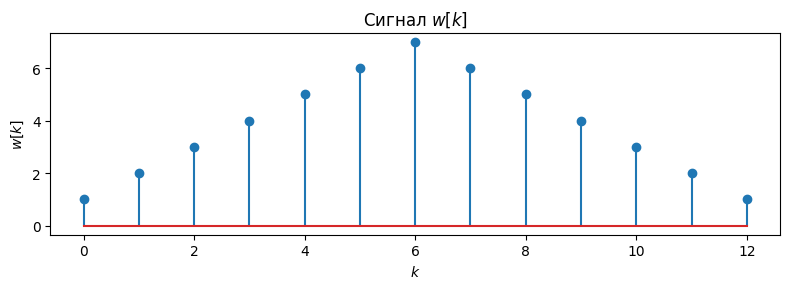

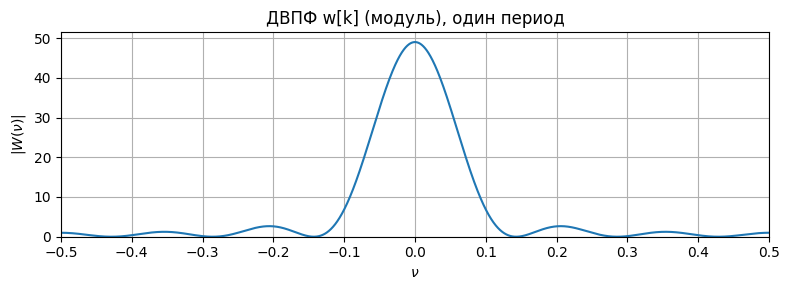

In [8]:
w = np.ones(N)
w_c = np.convolve(w, w, mode='full')
k = np.arange(w_c.size)

# Stem
plt.figure(figsize=[8, 3])
plt.stem(k, w_c)
plt.title('Сигнал $w[k]$')
plt.xlabel('$k$')
plt.ylabel('$w[k]$')
plt.tight_layout()

# DTFT abs
def dtft(x, M=2048):
    return  np.arange(M)/M-0.5, np.fft.fftshift(np.fft.fft(x, M))

plt.figure(figsize=[8, 3])
nu, W = dtft(w_c, M=2048)
plt.plot(nu, abs(W))

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ w[k] (модуль), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$|W(\\nu)|$')

plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

In [9]:
np.sum(w_c*w_c)

np.float64(231.0)

$$
X_N = \frac{\sin(\pi \nu N)}{\sin(\pi \nu)}e^{-j(N-1)\pi \nu} = \frac{\sin(7\pi \nu )}{\sin(\pi \nu)}e^{-j6\pi \nu}
$$
$$
X_c = (X_N)^2 = \frac{\sin^2(7\pi \nu )}{\sin^2(\pi \nu)}e^{-2j6\pi \nu}
$$

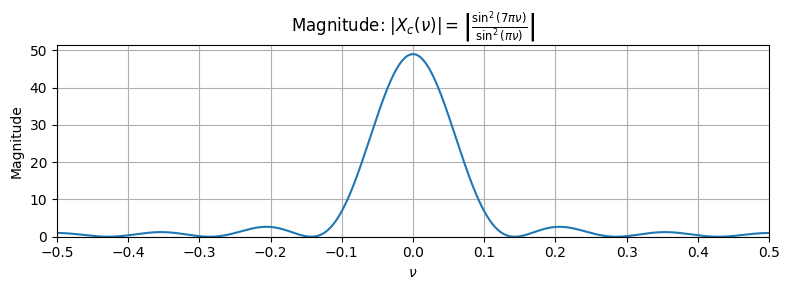

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def X_c(nu):
    numerator = np.sin(7 * np.pi * nu)**2
    denominator = np.sin(np.pi * nu)**2
    # Handle division by zero at nu=0 using L'Hôpital's rule limit
    with np.errstate(divide='ignore', invalid='ignore'):
        ratio = np.where(np.abs(nu) > 1e-10, 
                        numerator / denominator,
                        49)  # lim (ν→0) sin²(7πν)/sin²(πν) = 49
    return ratio * np.exp(-1j * 12 * np.pi * nu)

# Create ν values
nu = np.linspace(-0.5, 0.5, 2048)  # High resolution to capture details

# Calculate function values
X = X_c(nu)

# Plot magnitude and phase
plt.figure(figsize=(8, 3))

# Magnitude plot
plt.plot(nu, np.abs(X))
plt.title(r'Magnitude: $|X_c(\nu)| = \left|\frac{\sin^2(7\pi \nu)}{\sin^2(\pi \nu)}\right|$')
plt.xlabel(r'$\nu$')
plt.ylabel('Magnitude')
plt.grid()
plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.xticks(np.linspace(-0.5, 0.5, 11))

plt.tight_layout()


In [11]:
import numpy as np
from scipy.integrate import quad

def integrand(nu):
    # Handle the singularity at ν=0 using the limit sin⁴(7πν)/sin⁴(πν) → 7⁴ = 2401 as ν→0
    with np.errstate(divide='ignore', invalid='ignore'):
        ratio = np.where(np.abs(np.sin(np.pi * nu)) > 1e-10,
                        np.sin(7 * np.pi * nu)**4 / np.sin(np.pi * nu)**4,
                        2401.0)  # lim (ν→0) sin⁴(7πν)/sin⁴(πν) = 7⁴
    return ratio

# Perform numerical integration
result, error = quad(integrand, -0.5, 0.5)
print(f"Integral value: {result:.1f}")

Integral value: 231.0


# Занятие 2. Основные свойства ДПФ

$$ x[k] = \{9, 3, 2, 4, 6, 3, 4, 4\}, \\ m = 3 $$

## Задача 2.1. Алгоритмы вычисления ДПФ. 

Вычислите ДПФ $X[n]$ для последовательности $x[k]$ (в соответствии с Вашим вариантом). Воспользуйтесь следующими способами:

а) вычисление с использованием матричной формы ДПФ;

б) алгоритм быстрого преобразование Фурье (БПФ).

Сравните результаты. 


In [42]:
# x = [1.0, -6.0, 8.0, -4.0, 0.0, -7.0, 4.0, -9.0]
x = np.array([9.0, 3, 2, 4, 6, 3, 4, 4])
m = 3

N = 8

In [43]:
# Матричная форма ДПФ

def W(n, k, N):
    return np.exp(-1.j * 2 * np.pi * ((n * k) % N) / N)
    # return ((n * k) % N)

W = np.vectorize(W)

W_x = np.array(range(0, N))[:, np.newaxis]
W_y = np.array(range(0, N))

W_N = W(W_x, W_y, N)

# print(W_N)

X_n = W_N @ x

print(X_n)

[35.+0.00000000e+00j  3.+2.00000000e+00j  9.+2.00000000e+00j
  3.-2.00000000e+00j  7.-1.71450552e-15j  3.+2.00000000e+00j
  9.-2.00000000e+00j  3.-2.00000000e+00j]


In [44]:
# Алгоритм быстрого ДПФ

X_n_f = np.fft.fft(x)

print(X_n_f)


[35.+0.j  3.+2.j  9.+2.j  3.-2.j  7.+0.j  3.+2.j  9.-2.j  3.-2.j]


## Задача 2.2  Свойства симметрии ДПФ. 

Для последовательности $x[k]$ постройте графики $\text{Re}\ X[n]$, $\text{Im}\ X[n]$, $\left| X[n] \right|$, $\angle \ X[n]$.

Сравните получившиеся результаты со свойствами симметрии ДПФ. 


In [45]:
X_n = np.fft.fft(x)

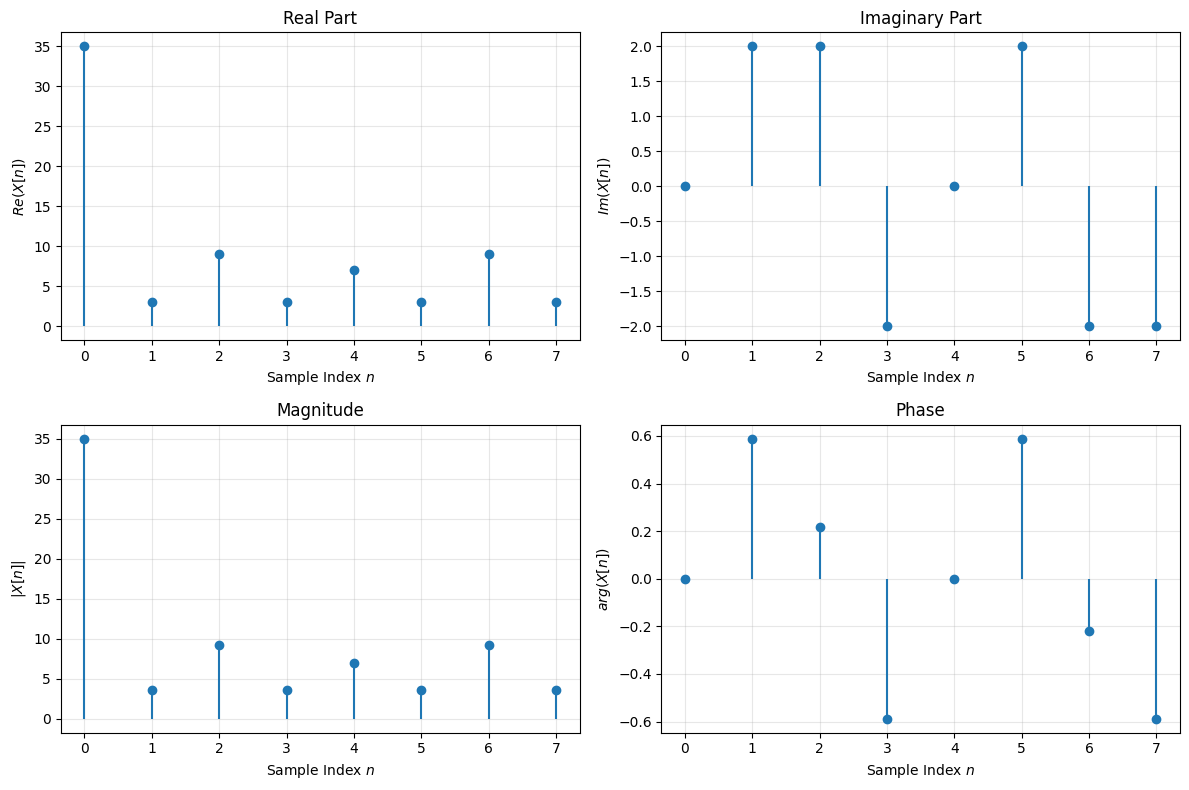

In [46]:
import matplotlib.pyplot as plt

# Generate sample indices
sample_indices = list(range(N))

# Define plot configurations: (function, ylabel, title_suffix)
plot_configs = [
    (np.real, "Re(X[n])", "Real Part"),
    (np.imag, "Im(X[n])", "Imaginary Part"),
    (np.abs, "|X[n]|", "Magnitude"),
    (np.angle, "arg(X[n])", "Phase")
]

# Create figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust spacing

# Flatten axes array for easy iteration
axes = axes.ravel()

# Create each subplot
for idx, (func, ylabel, title_suffix) in enumerate(plot_configs):
    # Create stem plot (updated for newer matplotlib versions)
    markerline, stemlines, baseline = axes[idx].stem(
        sample_indices, 
        func(X_n[sample_indices]),
        linefmt='C0-',
        markerfmt='C0o',
        basefmt=" "
    )
    
    # Formatting
    axes[idx].set_xlabel("Sample Index $n$", fontsize=10)
    axes[idx].set_ylabel(f"${ylabel}$", fontsize=10)
    axes[idx].set_title(f"{title_suffix}", fontsize=12)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Для действительной последовательности $x[k]$ верно $X^{*}[n] = X[(N - n)\ mod\ N]$.

## Задача 2.3.  Циклический сдвиг в ДПФ. 


Постройте график для последовательности $x[k]$.
Вычислите последовательность $y[k]$, ДПФ которой 
$Y[n]=\exp \left( -j\frac{2\pi }{8}mn \right)X[n].$

Сравните получившиеся последовательности. 


In [47]:
Y_n = X_n * np.array([np.exp(-1j * 2 * np.pi * n * m / 8) for n in range(N)])
y_k = np.fft.ifftn(Y_n)

Number of samples: N = 8


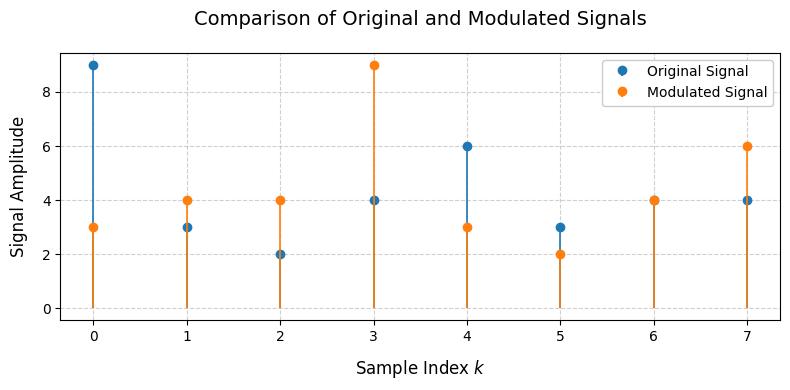

In [50]:
# Compute the modulated frequency domain signal
modulation_terms = np.array([np.exp(-1j * 2 * np.pi * n * m / 8) for n in range(N)])
modulated_signal = X_n * modulation_terms

# Compute the inverse FFT to get the time-domain signal
time_domain_signal = np.fft.ifftn(modulated_signal)

print(f"Number of samples: N = {N}")

# Create the plot with proper styling
plt.figure(figsize=(8, 4))

# Create stem plots using the modern approach
markerline, stemlines, baseline = plt.stem(
    x, 
    label='Original Signal',
    linefmt='C0-', 
    markerfmt='C0o',
    basefmt=' '
)

# Set stemline and marker properties
plt.setp(stemlines, color='C0', linewidth=1.2)
plt.setp(markerline, color='C0', markersize=6)

# Plot modulated signal
markerline, stemlines, baseline = plt.stem(
    time_domain_signal.real,  # Plot real part
    label='Modulated Signal',
    linefmt='C1-',
    markerfmt='C1o',
    basefmt=' ',
)

# Set properties for second stem plot
plt.setp(stemlines, color='C1', linewidth=1.2)
plt.setp(markerline, color='C1', markersize=6)

# Add plot decorations
plt.xlabel("Sample Index $k$", fontsize=12, labelpad=10)
plt.ylabel("Signal Amplitude", fontsize=12, labelpad=10)
plt.title("Comparison of Original and Modulated Signals", fontsize=14, pad=20)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10, framealpha=1)

# Adjust layout and show
plt.tight_layout()
plt.show()

Видим, что сигнал циклически сдвинулся на три отсчёта вправо.

# Занятие 3. Связь ДВПФ и ДПФ

## Задача 3.1. Интерполяция  ДВПФ добавлением нулевых отсчетов в сигнал.

Постройте на одном графике модули ДВПФ $\left| X(\nu ) \right|$ и ДПФ $\left| X[n] \right|$ последовательности ($N=32$)

x[k] = 
\begin{cases}
   \sin\left( \dfrac{2\pi}{N}m_0k \right) + \sin\left( \dfrac{2\pi}{N}\left(m_0 + 0.25\right)k \right), & 0 \leq k \leq N-1; \\
   0, & \text{при других k}.
\end{cases}


Увеличьте размерность ДПФ, добавив нулевые отсчеты так, чтобы все относительные частоты синусоид попадали на бины ДПФ.\
Приведите на одном графике модули ДВПФ $\left| X(\nu ) \right|$ и ДПФ $\left| X[n] \right|$  для этого случая. Сравните результаты. 

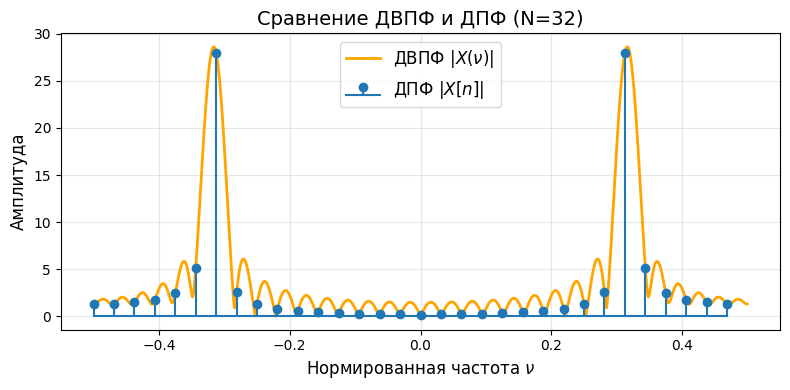

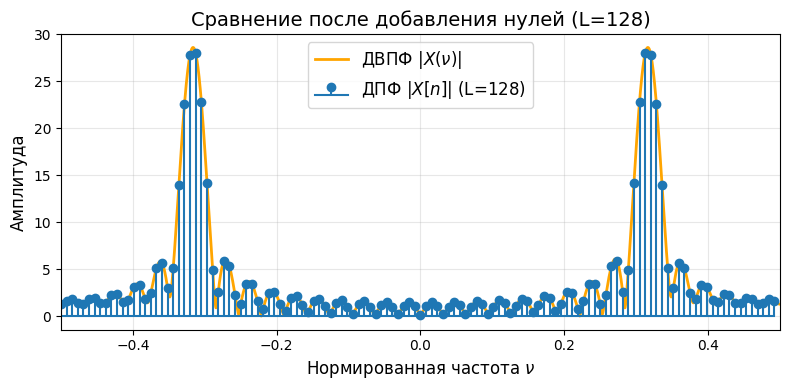

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры сигнала
m_0 = 10
N = 32
M = 4096  # Большое число для гладкого ДВПФ

# 1. Исходный сигнал и его анализ
k = np.arange(N)
x_n = np.sin(2*np.pi*m_0*k/N) + np.sin(2*np.pi*(m_0 + 0.25)*k/N)

# ДПФ исходного сигнала
DFT = np.abs(np.fft.fftshift(np.fft.fft(x_n)))
freq_DFT = np.fft.fftshift(np.fft.fftfreq(N, 1/N))/N  # Нормированные частоты

# ДВПФ (высокое разрешение)
nu_i = np.linspace(-0.5, 0.5, M, endpoint=False)
DTFT = np.abs(np.fft.fftshift(np.fft.fft(x_n, M)))

plt.figure(figsize=(8, 4))
plt.plot(nu_i, DTFT, label=r"ДВПФ $|X(\nu)|$", color="orange", linewidth=2)
plt.stem(freq_DFT, DFT, label=r"ДПФ $|X[n]|$", linefmt='C0-', markerfmt='C0o', basefmt='C0-')
plt.xlabel(r"Нормированная частота $\nu$", fontsize=12)
plt.ylabel(r"Амплитуда", fontsize=12)
plt.title(f"Сравнение ДВПФ и ДПФ (N={N})", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Увеличение размерности ДПФ добавлением нулей
# Выбираем новую размерность так, чтобы 0.25 попадало на бины
L = 4*N  # 0.25 -> 1 бину при увеличении в 4 раза
x_padded = np.concatenate((x_n, np.zeros(L - N)))

# ДПФ с добавлением нулей
DFT_padded = np.abs(np.fft.fftshift(np.fft.fft(x_padded)))
freq_DFT_padded = np.fft.fftshift(np.fft.fftfreq(L, 1/N))/N  # Нормировка по исходной N

plt.figure(figsize=(8, 4))
plt.plot(nu_i, DTFT, label=r"ДВПФ $|X(\nu)|$", color="orange", linewidth=2)
plt.stem(freq_DFT_padded, DFT_padded, label=rf"ДПФ $|X[n]|$ (L={L})", 
         linefmt='C0-', markerfmt='C0o', basefmt='C0-')
plt.xlabel(r"Нормированная частота $\nu$", fontsize=12)
plt.ylabel(r"Амплитуда", fontsize=12)
plt.title(f"Сравнение после добавления нулей (L={L})", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim([-0.5, 0.5])  # Одинаковые пределы для сравнения
plt.tight_layout()
plt.show()

## Задача 3.2. ДВПФ и ДПФ периодической последовательсти.

Простройте графики для действительной  и мнимой части коэффициентов ДПФ $\tilde{X}[n]$ периодической последовательности $x[k]=\cos \left( \frac{2\pi }{N}mk \right)+\sin \left( \frac{2\pi }{N}mk \right)$  с периодом $N=32$, для случаев $m={{m}_{0}}$ и $m={{m}_{0}}+{{m}_{1}}$. Получите аналитическую запись ДПФ. Сравните ДПФ последовательности с ее ДВПФ. Определите, выполняется ли связь между весами дельта-функций в ДВПФ и величинами отсчетов ДПФ. 

Так как
$$
x[k] = \Big( \frac{1}{2} + \frac{1}{2j} \Big)e^{j\frac{2\pi}{N}mk} + \Big( \frac{1}{2} - \frac{1}{2j} \Big)e^{-j\frac{2\pi}{N}mk}
$$
То
$$
\tilde{X}[n] = N(\frac{1}{2} - \frac{j}{2}), n = m\\
N(\frac{1}{2} + \frac{j}{2}), n = N - m\\ 
0,\ иначе
$$

In [3]:
import numpy as np
N = 32
M = 1024
nu = np.linspace(0, N, M, endpoint=False)
nu[:,None]

array([[0.000000e+00],
       [3.125000e-02],
       [6.250000e-02],
       ...,
       [3.190625e+01],
       [3.193750e+01],
       [3.196875e+01]], shape=(1024, 1))

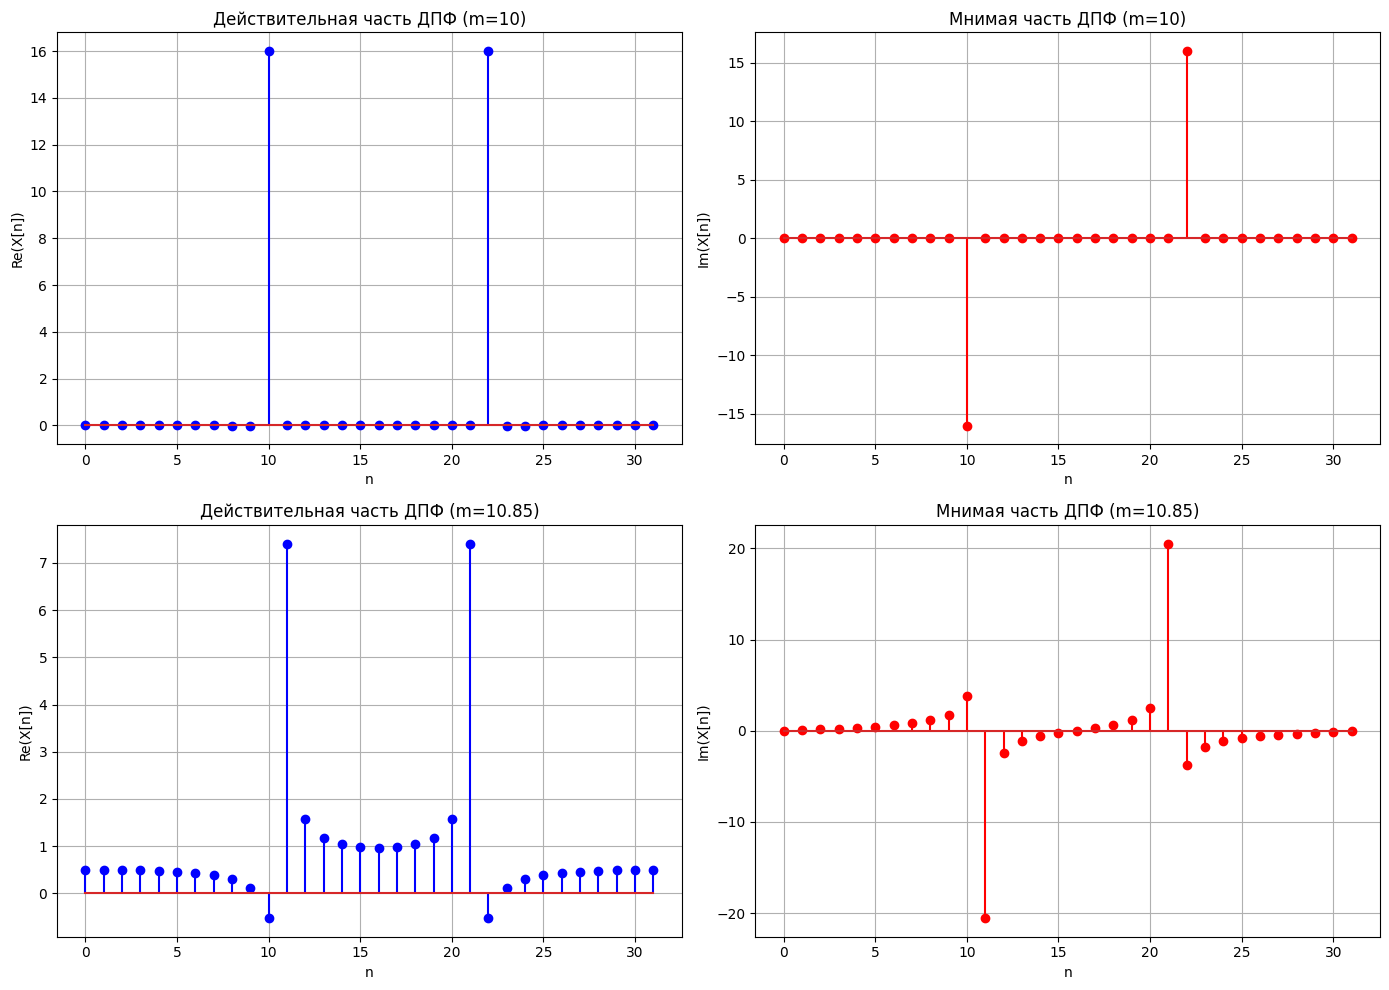

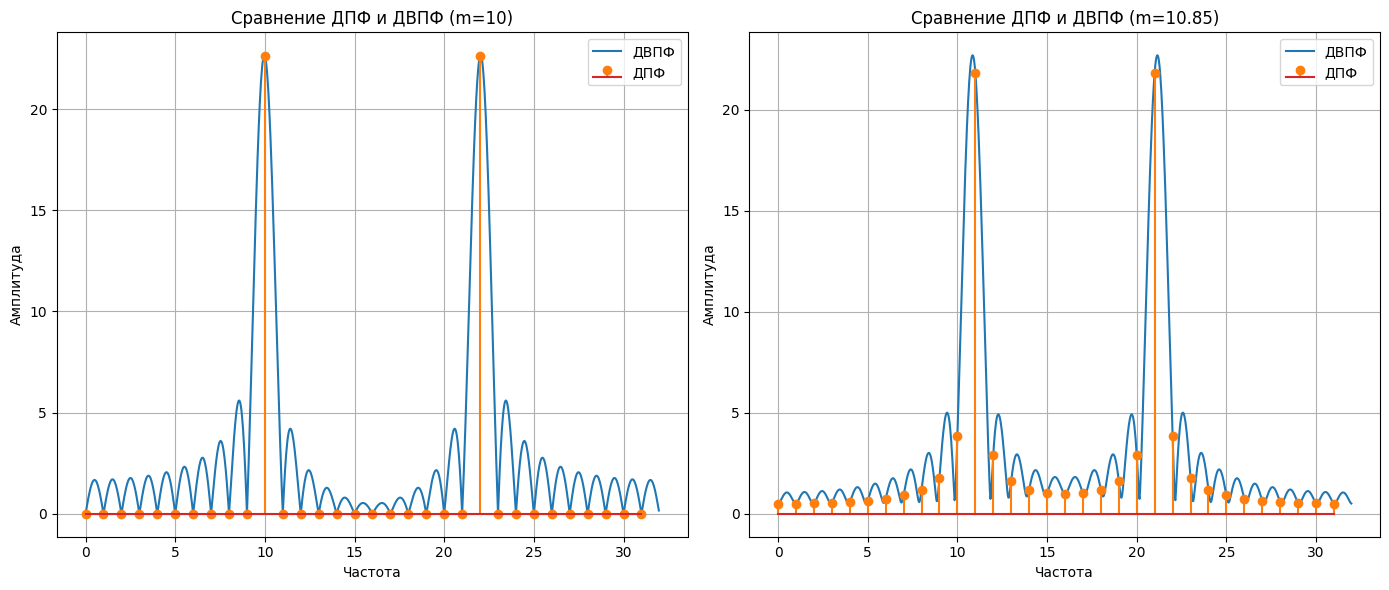

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 32
m0 = 10
m1 = 0.85

# Функция для генерации сигнала и вычисления ДПФ
def analyze_signal(m):
    k = np.arange(N)
    x = np.cos(2*np.pi/N * m * k) + np.sin(2*np.pi/N * m * k)
    
    # ДПФ
    X = np.fft.fft(x)
    
    # ДВПФ (высокое разрешение)
    M = 1024
    nu = np.linspace(0, N, M, endpoint=False)
    X_nu = np.sum(x * np.exp(-2j*np.pi * nu[:,None] * k[None,:]/N), axis=1)
    
    return x, X, nu, X_nu

# Случай 1: m = m0 (целое)
x1, X1, nu1, X_nu1 = analyze_signal(m0)

# Случай 2: m = m0 + m1 (не целое)
x2, X2, nu2, X_nu2 = analyze_signal(m0 + m1)

# Построение графиков
plt.figure(figsize=(14, 10))

# Графики для m = m0
plt.subplot(2, 2, 1)
plt.stem(np.arange(N), np.real(X1), label='Re', linefmt='b-', markerfmt='bo')
plt.title(f'Действительная часть ДПФ (m={m0})')
plt.xlabel('n')
plt.ylabel('Re(X[n])')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.stem(np.arange(N), np.imag(X1), label='Im', linefmt='r-', markerfmt='ro')
plt.title(f'Мнимая часть ДПФ (m={m0})')
plt.xlabel('n')
plt.ylabel('Im(X[n])')
plt.grid(True)

# Графики для m = m0 + m1
plt.subplot(2, 2, 3)
plt.stem(np.arange(N), np.real(X2), label='Re', linefmt='b-', markerfmt='bo')
plt.title(f'Действительная часть ДПФ (m={m0+m1})')
plt.xlabel('n')
plt.ylabel('Re(X[n])')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.stem(np.arange(N), np.imag(X2), label='Im', linefmt='r-', markerfmt='ro')
plt.title(f'Мнимая часть ДПФ (m={m0+m1})')
plt.xlabel('n')
plt.ylabel('Im(X[n])')
plt.grid(True)

plt.tight_layout()
plt.show()

# Сравнение ДПФ и ДВПФ
plt.figure(figsize=(14, 6))

# Для m = m0
plt.subplot(1, 2, 1)
plt.plot(nu1, np.abs(X_nu1), label='ДВПФ')
plt.stem(np.arange(N), np.abs(X1), label='ДПФ', linefmt='C1-', markerfmt='C1o')
plt.title(f'Сравнение ДПФ и ДВПФ (m={m0})')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid(True)

# Для m = m0 + m1
plt.subplot(1, 2, 2)
plt.plot(nu2, np.abs(X_nu2), label='ДВПФ')
plt.stem(np.arange(N), np.abs(X2), label='ДПФ', linefmt='C1-', markerfmt='C1o')
plt.title(f'Сравнение ДПФ и ДВПФ (m={m0+m1})')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

/home/rdf/repos/radioph/.venv/lib64/python3.13/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/rdf/repos/radioph/.venv/lib64/python3.13/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


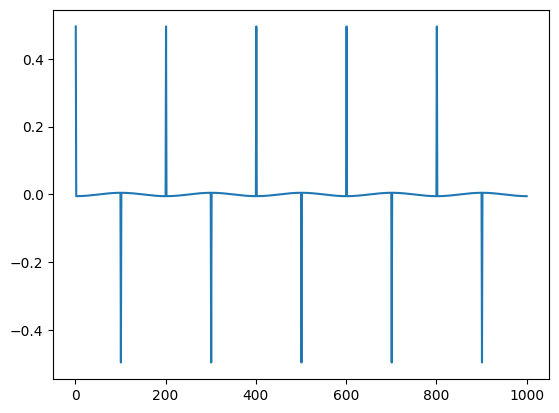

In [28]:
import matplotlib.pyplot as plt

N = 10

m = np.arange(1, 100)
ns = 5 + m*N
X = np.zeros(1000)
X[ns] = 5

y = np.fft.ifft(X)
plt.plot(np.arange(1,1000+1), y)